In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Load datasets
train_df = pd.read_excel(r'C:\Users\prajw\Documents\ResaluteAI.in\PFA\train.xlsx')
test_df = pd.read_excel(r'C:\Users\prajw\Documents\ResaluteAI.in\PFA\test.xlsx')

In [19]:
# Assuming 'target' is the column to predict
target_column = 'target'
print("for testing")
print(test_df.head())
print("for trining ")
print(train_df.head())

for testing
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -76 -83 -70 -66 -64 -72 -64 -69 -60  -76  -83  -78  -81  -81  -81  -70  -60   
1 -58 -57 -78 -81 -73 -73 -78 -78 -82  -49  -55  -58  -66  -79  -72  -83  -74   
2 -70 -70 -71 -69 -69 -68 -61 -55 -53  -82  -87  -76  -68  -57  -64  -75  -57   
3 -71 -61 -56 -56 -61 -60 -68 -66 -72  -58  -55  -56  -58  -62  -61  -59  -64   
4 -72 -71 -64 -69 -64 -63 -61 -42 -55  -61  -69  -67  -63  -63  -55  -49  -49   

   T18  
0  -60  
1  -80  
2  -70  
3  -65  
4  -57  
for trining 
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70

In [20]:
# Separate features and target in training data
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]



In [21]:
X_test = test_df


In [22]:
# Preprocessing
# Convert categorical columns to numerical if necessary
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

In [23]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define and train classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [25]:
# Train and evaluate models
train_accuracies = {}
test_predictions = {}

In [26]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    test_predictions[name] = model.predict(X_test_scaled)
    train_accuracies[name] = train_accuracy

    print(f"{name} - Training Accuracy: {train_accuracy:.2f}")

c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Accuracy: 0.98
Decision Tree - Training Accuracy: 1.00
Random Forest - Training Accuracy: 1.00


In [27]:
# Save predictions to CSV (or any format needed)
predictions_df = pd.DataFrame(test_predictions)
predictions_df.to_csv('test_predictions.csv', index=False)

In [28]:
for name, predictions in test_predictions.items():
    print(f"{name} Test Predictions:")
    print(predictions)

Logistic Regression Test Predictions:
['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']
Decision Tree Test Predictions:
['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']
Random Forest Test Predictions:
['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


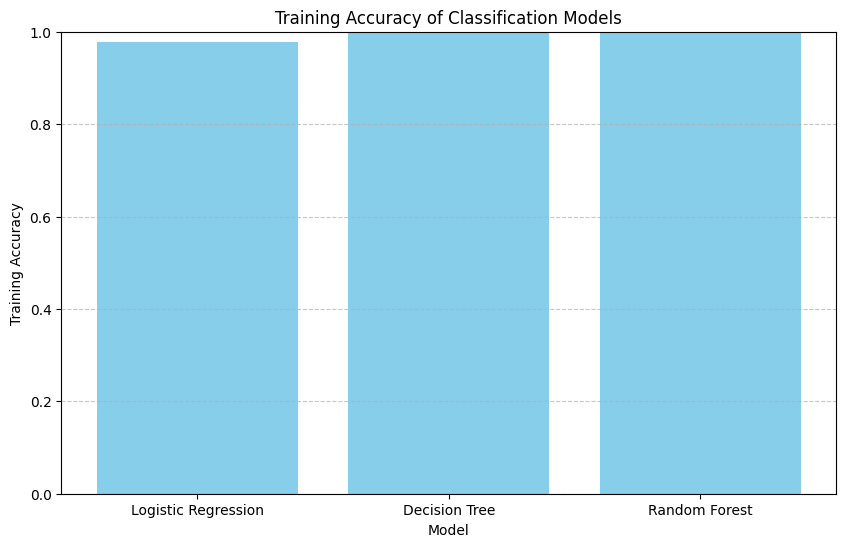

In [29]:
import matplotlib.pyplot as plt

# Define model names and their accuracies
model_names = list(train_accuracies.keys())
accuracies = list(train_accuracies.values())

# Plot training accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy of Classification Models')
plt.ylim(0, 1)  # Accuracy 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
